### Charging 

The dust particle only begins charging upon crossing a boundary. The equilibrium charge for a given particle depends on the particle size, type, and the local medium voltage; as 

$$Q = 4 \pi \epsilon_0 a U,$$

meaning that the charge to mass ratio becomes 

$$\frac{Q}{m} = \frac{3 \epsilon_0 U}{\rho a^2}.$$

We can use the boundary values from Tim for the local potential to calculate the equilibrium charge to mass ratio for various particles. These values for the potential are defined in the interstellar medium, the very local interstellar medium, the heliosheath and within the termination shock of the heliosphere. 

The charging can be modelled as instantaneous or continuous. In the case of instantaneous charging, the dust grain is modelled to immediately reach the equilibrium charge upon crossing a boundary. If the trajectory brings it across another boundary, or perhaps even the same one, the charge is again instantly adjusted. Through this, we only update the particle's charge to mass ratio at specific steps in the particle's integration if a boundary is crossed, constantly monitored using callback function in Julia's DifferentialEquations.jl. 

In the second case of continuous charging, we need a way to model the rate of change of charge over time, for a particle of given charge and properties. Thie requires us to use a detailed analytical model (currently not available), an empirical model fit to data (currently being worked on by Tim), or an analytical approximation. We choose to model the charging as an exponential change,

$$ \frac{Q}{m} = \left(\frac{Q}{m} \right)_0 + \left( \left(\frac{Q}{m}\right)_{\text{Eq}} - \left(\frac{Q}{m}\right)_0  \right) \left(1 - e^{-t/\tau}\right), $$

where the equilibrium Q/m of the particle and the initial Q/m upon passing the boundary into the new region are clearly labelled. This results in an expression for the derivative of the charge to mass ratio with respect to time, as a function of the charge value, namely

$$ \dot{ \left( \frac{Q}{m} \right) } = \left(  \left( \frac{Q}{m}\right)_{\text{Eq}} - \left( \frac{Q}{m}\right)_{0} \right) / \tau  $$

with the half-life parameter extracted by fitting to Tim's charging results within each of the boundaries. 

In [37]:
using Pkg
using TOML 
using LinearAlgebra
using DifferentialEquations
using Random
using Plots
using Interpolations 

In [38]:
include(joinpath(@__DIR__, "..", "src", "utils.jl"))
include(joinpath(@__DIR__, "..", "src", "constants.jl"))
include(joinpath(@__DIR__, "..", "src", "magnetic_field.jl"))
include(joinpath(@__DIR__, "..", "src", "plasma_field.jl"))
include(joinpath(@__DIR__, "..", "src", "plotting.jl"))
include(joinpath(@__DIR__, "..", "src", "charging.jl"))
include(joinpath(@__DIR__, "..", "src", "trajectory.jl")) 

EqMotionContinuous! (generic function with 1 method)

Import the charging dictionary of parameters 

In [40]:
input_file = joinpath(@__DIR__, "..", "main", "input_values.toml")
input_parameters = load_parameters(input_file) 

println("=== Input Parameters === \n") 
pretty_print_table(input_parameters)  
println("\n")

=== Input Parameters === 

particle_size = 150                                           n_grid = 20                                                 
distance_TS = 1.1967829656e13                                 charging_type = continuous                                  
plasma_model = turning_turning                                q_over_m_value = 16.0                                       
beta_angle = 0.0                                              B_mag_ISM = 6.0e-10                                         
mode = full                                                   distance_Approach = 2.2439680605e12                         
dt = 50000.0                                                  particle_type = silicate                                    
alpha_angle = 180.0                                           plane = both                                                
plot_color = speed                                            plot_vectors = true                               

Constant charge (no charging)

In [32]:
input_parameters["charging_type"] = "constant" 
input_parameters["q_over_m_value"] = 60.0

60.0

In [33]:
res_traj, saved_charges = ComputeTrajectory(input_parameters); 

--- Solution Characteristics ---
Integration time: 0.0 → 16.0 years
Solution size: (6, 10100)


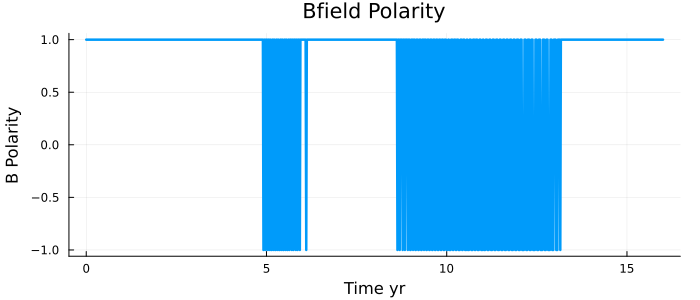

In [41]:
Bfield_over_time(res_traj, input_parameters)

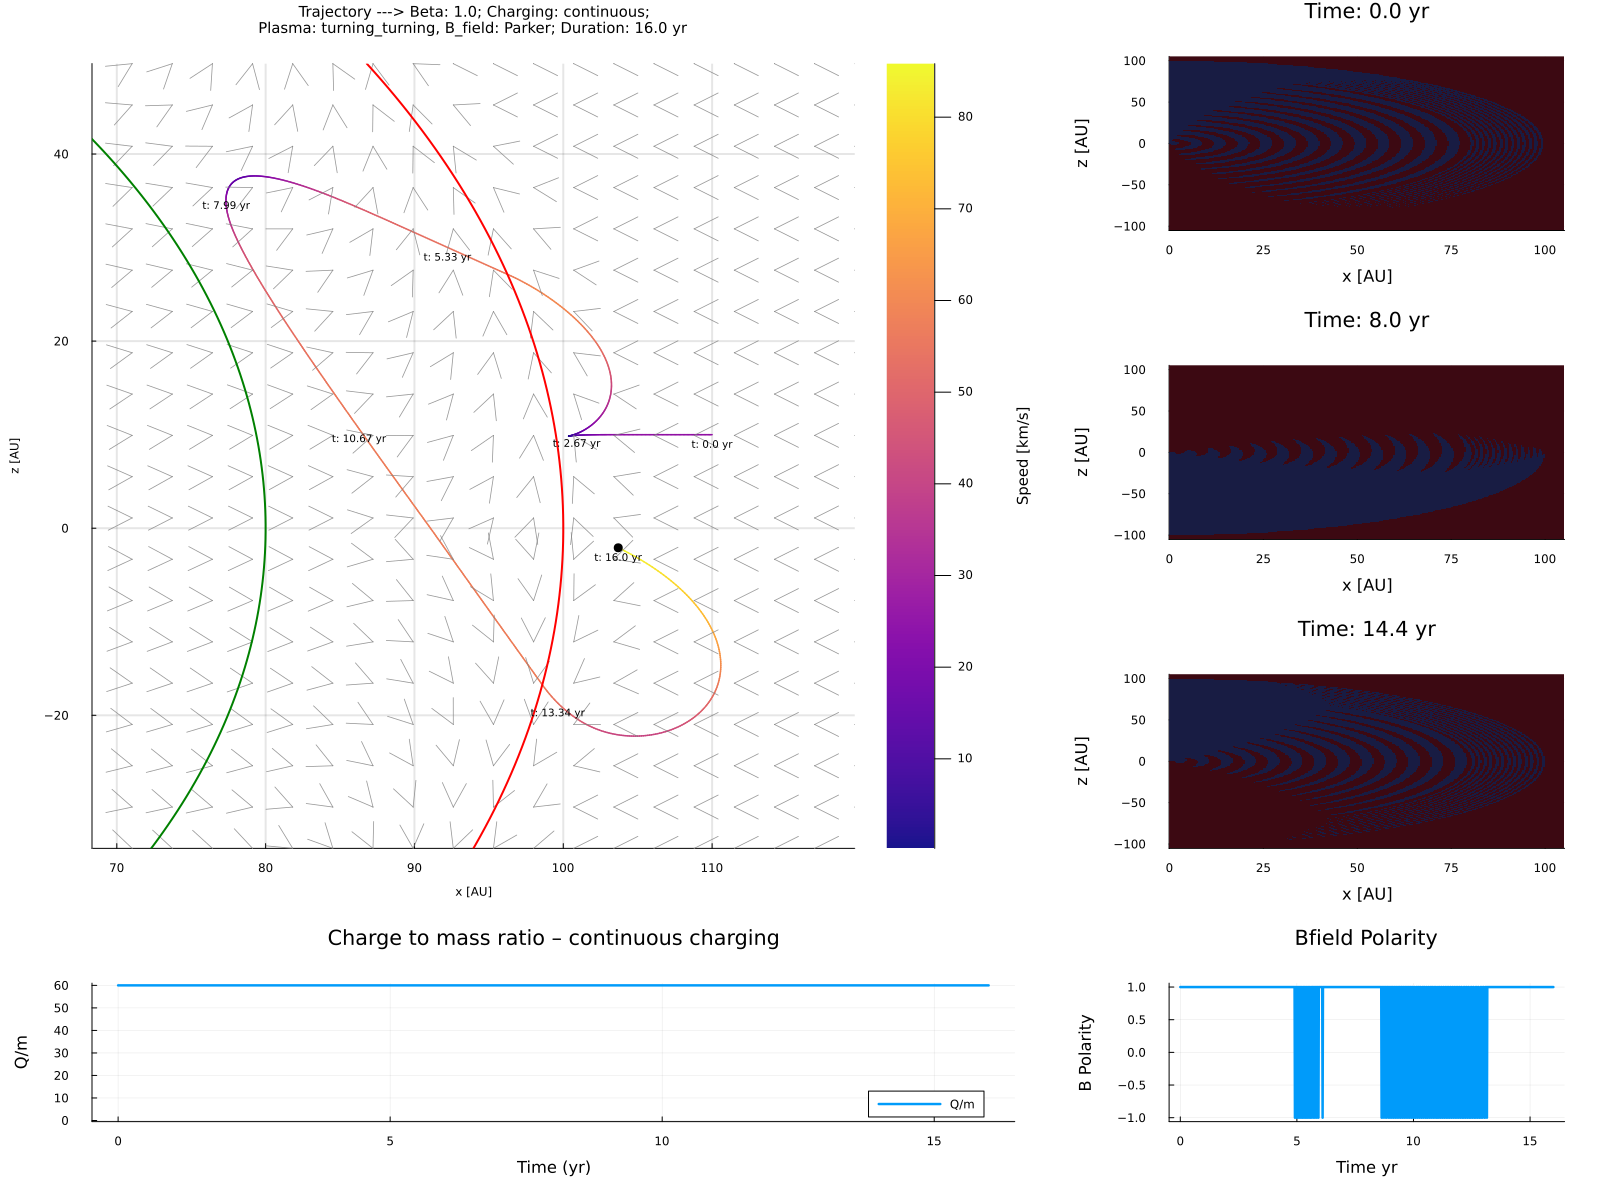

In [43]:
Plotter(res_traj, input_parameters; plot_B_fields=true, charges=saved_charges) 

Instantaneous Charging 

In [46]:
input_parameters["charging_type"] = "instant" 

"instant"

In [47]:
res_traj, saved_charges = ComputeTrajectory(input_parameters); 

Affect triggered at 100.0 AU. New Q/m of 4.25
Affect triggered at 80.0 AU. New Q/m of 5.582
--- Solution Characteristics ---
Integration time: 0.0 → 16.0 years
Solution size: (6, 10103)


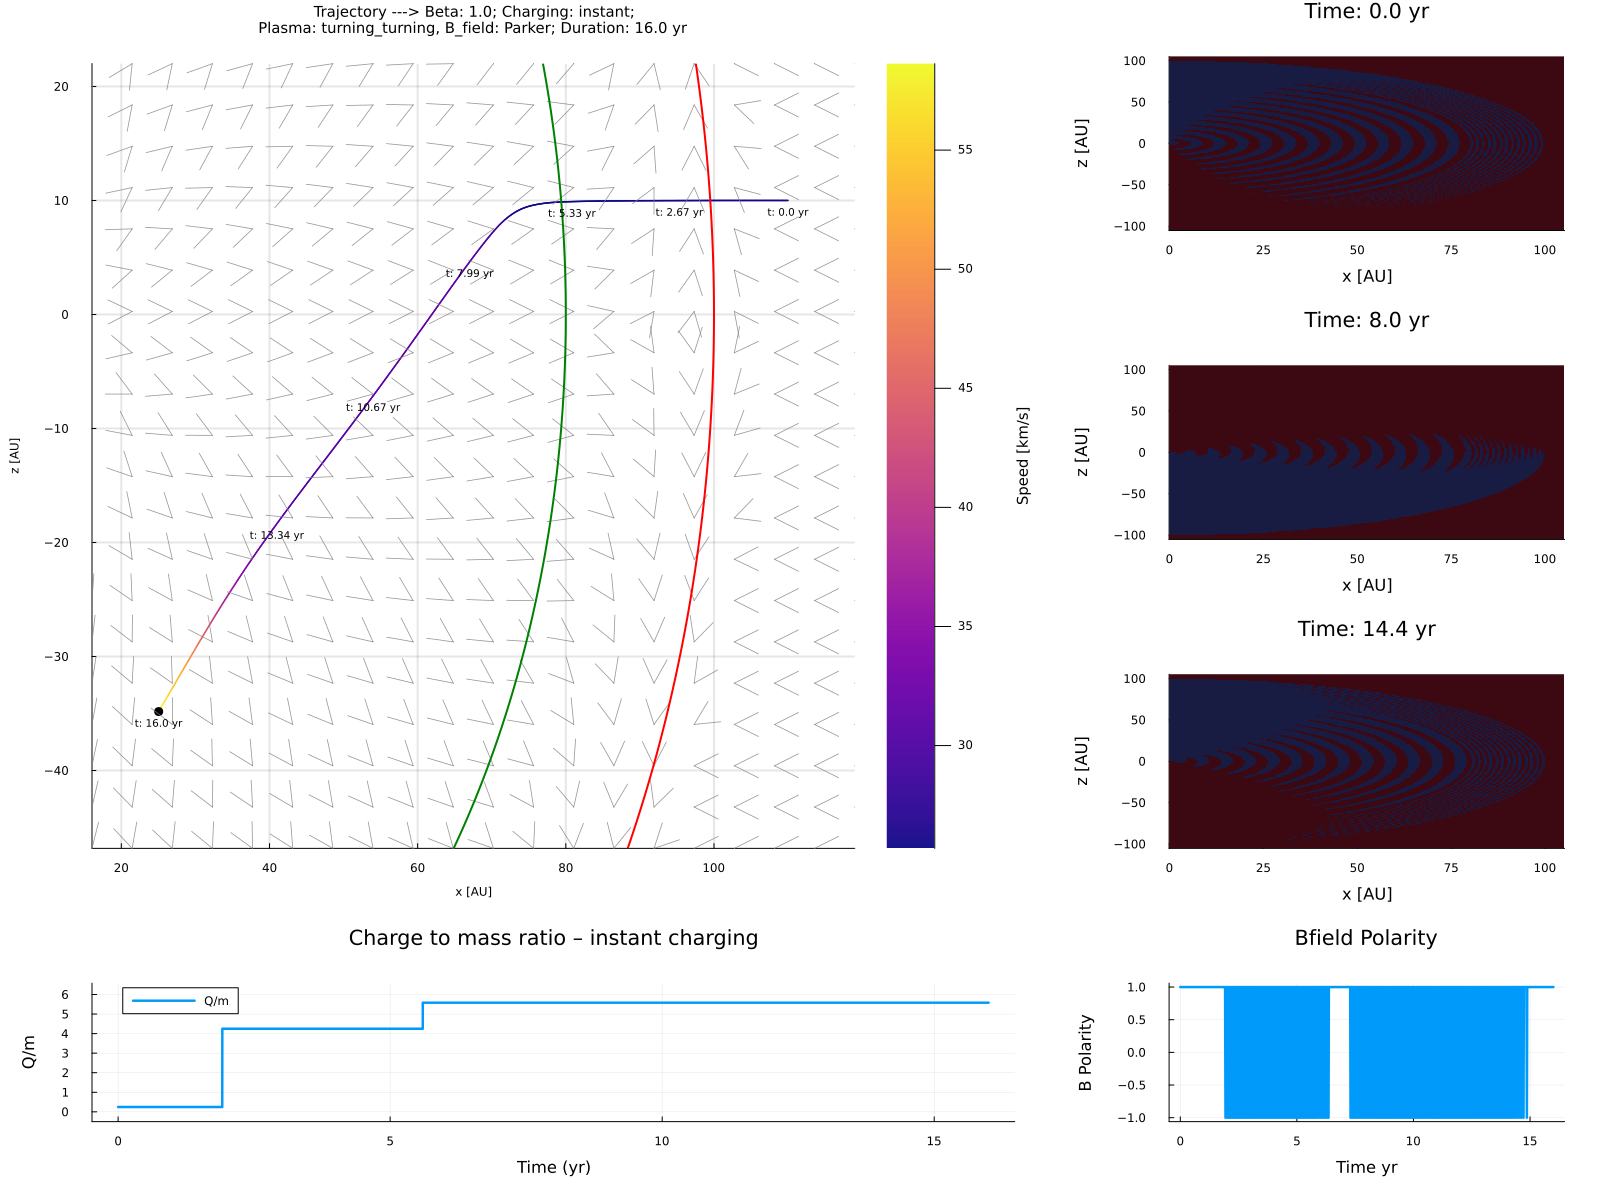

In [48]:
Plotter(res_traj, input_parameters; plot_B_fields=true, charges=saved_charges) 

Continuous charging 

In [51]:
input_parameters["charging_type"] = "continuous" 

"continuous"

In [52]:
res_traj, saved_charges = ComputeTrajectory(input_parameters); 

--- Solution Characteristics ---
Integration time: 0.0 → 16.0 years
Solution size: (7, 10100)


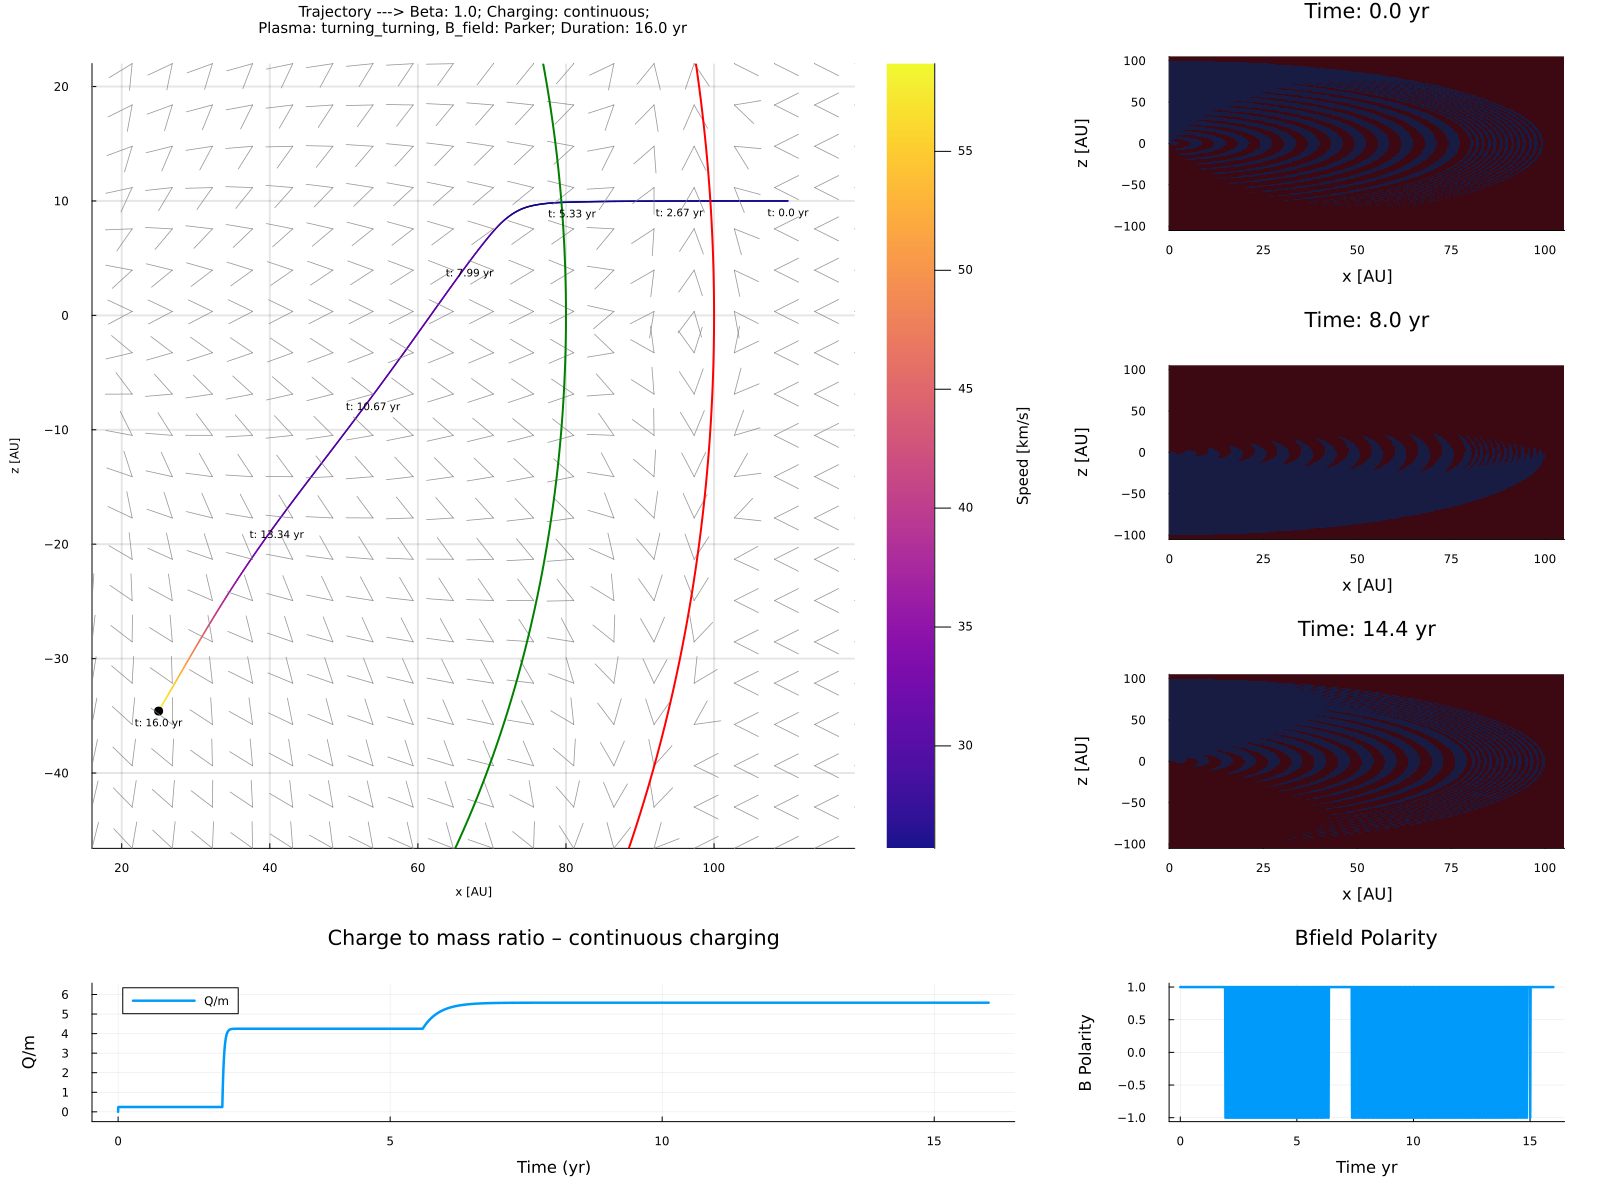

In [53]:
Plotter(res_traj, input_parameters; plot_B_fields=true, charges=saved_charges) 